# The Project #
1. This is a project with minimal scaffolding. Expect to use the the discussion forums to gain insights! It’s not cheating to ask others for opinions or perspectives!
2. Be inquisitive, try out new things.
3. Use the previous modules for insights into how to complete the functions! You'll have to combine Pillow, OpenCV, and Pytesseract
4. There are hints provided in Coursera, feel free to explore the hints if needed. Each hint provide progressively more details on how to solve the issue. This project is intended to be comprehensive and difficult if you do it without the hints.

### The Assignment ###
Take a [ZIP file](https://en.wikipedia.org/wiki/Zip_(file_format)) of images and process them, using a [library built into python](https://docs.python.org/3/library/zipfile.html) that you need to learn how to use. A ZIP file takes several different files and compresses them, thus saving space, into one single file. The files in the ZIP file we provide are newspaper images (like you saw in week 3). Your task is to write python code which allows one to search through the images looking for the occurrences of keywords and faces. E.g. if you search for "pizza" it will return a contact sheet of all of the faces which were located on the newspaper page which mentions "pizza". This will test your ability to learn a new ([library](https://docs.python.org/3/library/zipfile.html)), your ability to use OpenCV to detect faces, your ability to use tesseract to do optical character recognition, and your ability to use PIL to composite images together into contact sheets.

Each page of the newspapers is saved as a single PNG image in a file called [images.zip](./readonly/images.zip). These newspapers are in english, and contain a variety of stories, advertisements and images. Note: This file is fairly large (~200 MB) and may take some time to work with, I would encourage you to use [small_img.zip](./readonly/small_img.zip) for testing.

Here's an example of the output expected. Using the [small_img.zip](./readonly/small_img.zip) file, if I search for the string "Christopher" I should see the following image:
![Christopher Search](./readonly/small_project.png)
If I were to use the [images.zip](./readonly/images.zip) file and search for "Mark" I should see the following image (note that there are times when there are no faces on a page, but a word is found!):
![Mark Search](./readonly/large_project.png)

Note: That big file can take some time to process - for me it took nearly ten minutes! Use the small one for testing.

In [1]:
import zipfile
import math
import PIL
from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# Read all the files from the zip file and then store in teh objects
zp = zipfile.ZipFile('readonly/images.zip', 'r')
images = []
texts = []
all_faces = []
for name in zp.namelist():
    file = zp.open(name)
    image = Image.open(file)
    images.append(image)
    bnw_image = image.convert('L')
    texts.append(pytesseract.image_to_string(Image.open(file)))
    faces = face_cascade.detectMultiScale(np.array(bnw_image),1.3)
    bounding_box = []
    for box in faces:
        new_box = [box[0], box[1], box[0]+box[2], box[1]+box[3]]
        bounding_box.append(new_box)
    all_faces.append(bounding_box)

In [2]:
#function for getting a text and return the chontact sheet
def SearchImages(search_text):
    file_names = zp.namelist()
    count = 0
    page_nos = []
    for text in texts:
        if search_text in text:
            page_nos.append(count)
        count+=1
    if page_nos == []: print("We did not find your text")
    else:
        for page in page_nos:
            if all_faces[page] == []:print("But this file does not have any faces")
            else:
                vertical_img_no = math.ceil(len(all_faces[page])/5)
                contact_sheet=PIL.Image.new(images[0].mode,(500,vertical_img_no*100))
                new_size=(100,100)
                x = 0
                y = 0
                for box in all_faces[page]:
                    face=images[page].crop(box)
                    resized_image=face.resize(new_size, Image.BICUBIC)
                    contact_sheet.paste(resized_image, (x,y))
                    if x+resized_image.width == contact_sheet.width:
                        x=0
                        y=y+resized_image.height
                    else:
                        x=x+resized_image.width
                print("We found your text in file: {}, and here are the faces".format(file_names[page]))
                display(contact_sheet)

Please write the string:Mark
We found your text in file: a-0.png, and here are the faces


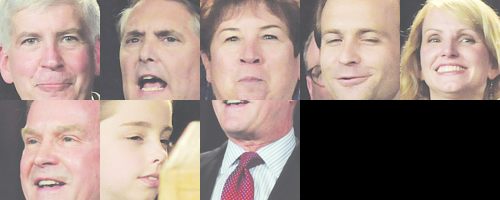

We found your text in file: a-1.png, and here are the faces


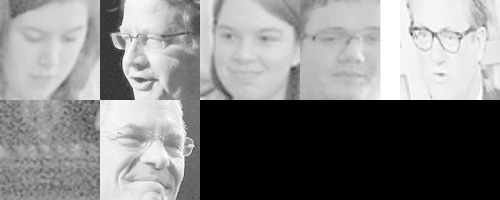

But this file does not have any faces
We found your text in file: a-13.png, and here are the faces


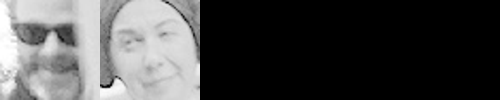

We found your text in file: a-2.png, and here are the faces


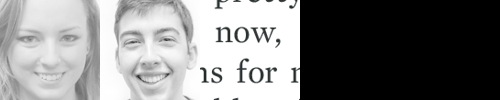

We found your text in file: a-3.png, and here are the faces


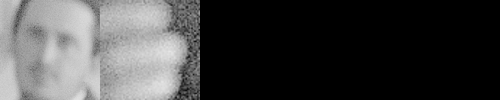

But this file does not have any faces


In [3]:
input_text = input("Please write the string:")
SearchImages(input_text)

Please write the string:Christopher
We found your text in file: a-0.png, and here are the faces


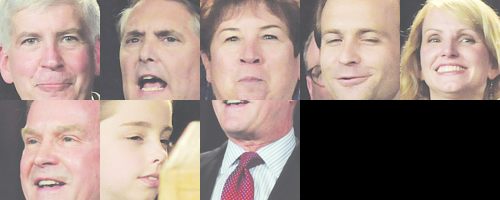

We found your text in file: a-3.png, and here are the faces


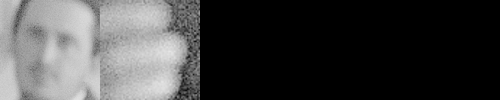

In [4]:
input_text = input("Please write the string:")
SearchImages(input_text)